In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv('CC GENERAL.csv')

In [5]:
#reading dataset
df.head(n=15)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [6]:
# rows and columns of the dataset 
df.shape

(8950, 18)

In [7]:
columns=df.columns

In [8]:
# checking anything weird in the data 
columns = df.columns
for col in columns:
    print(col + ':')
    print(df[col].unique(), '\n')

CUST_ID:
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190'] 

BALANCE:
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075] 

BALANCE_FREQUENCY:
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667] 

PURCHASES:
[  95.4     0.    773.17 ...  291.12  144.4  1093.25] 

ONEOFF_PURCHASES:
[   0.    773.17 1499.   ...  734.4  1012.73 1093.25] 

INSTALLMENTS_PURCHASES:
[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ] 

CASH_ADVANCE:
[   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008] 

PURCHASES_FREQUENCY:
[0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 0.5      0.416667 0.916667

seems that data have some null values 
lets handle it 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

MINIMUM_PAYMENTS column and CREDIT_LIMIT has null values

Lets check sum of these null values

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


the data seems skewed due to large difference between mean and median values in many columns

# Treating Data 

In [12]:
cat_columns = df.select_dtypes(include='object').columns
print('Categorical columns: \n', cat_columns)

print('\n')

cont_columns = df.select_dtypes(exclude='object').columns
print('Continous columns: \n', cont_columns)

Categorical columns: 
 Index(['CUST_ID'], dtype='object')


Continous columns: 
 Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


we have only one categorical column "CUST_ID" which I wont use, so we will drop it 

In [13]:
df.drop(['CUST_ID'],axis=1,inplace=True)

Removing null values with knn imputer which helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.

In [14]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df[cont_columns] = imputer.fit_transform(df[cont_columns])

In [15]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
#checking for duplicates
df.duplicated().sum()

0

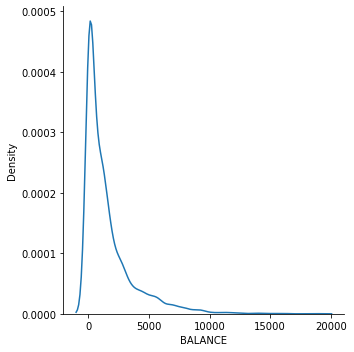

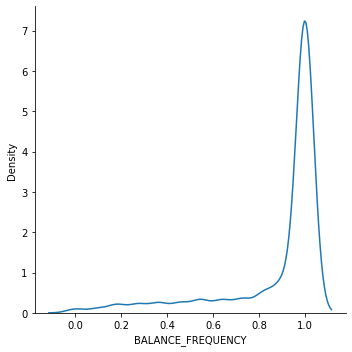

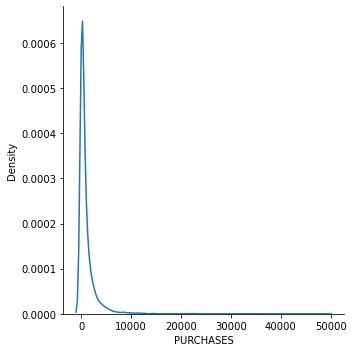

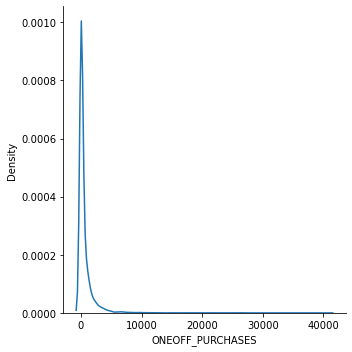

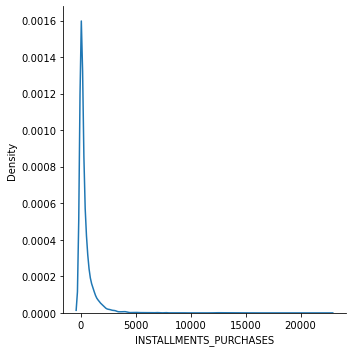

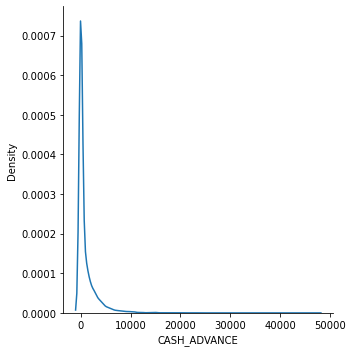

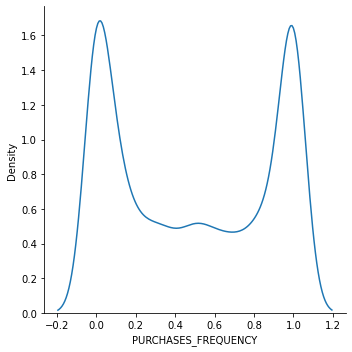

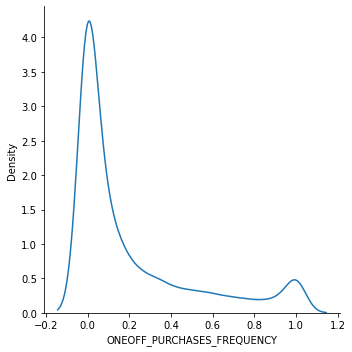

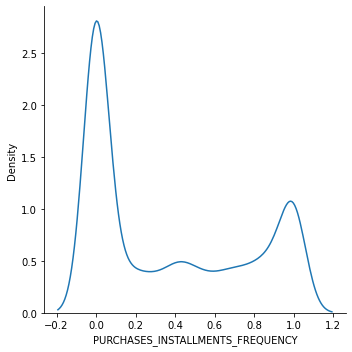

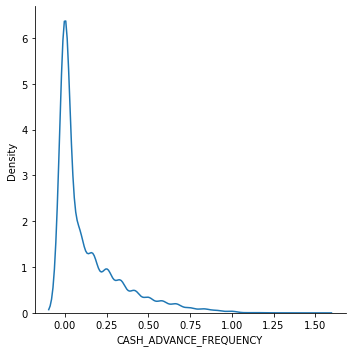

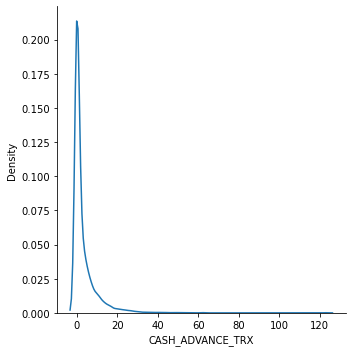

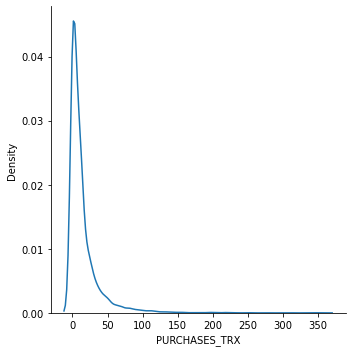

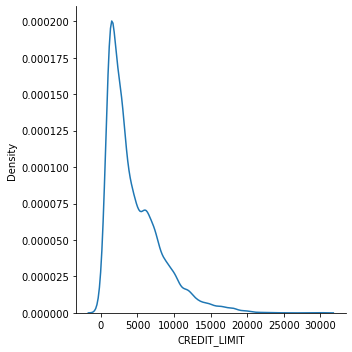

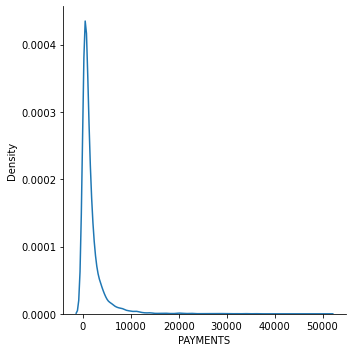

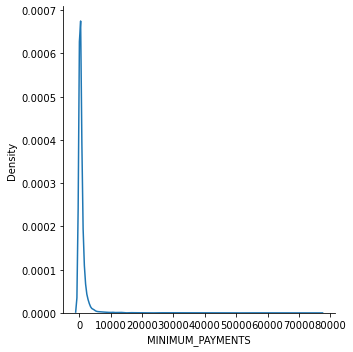

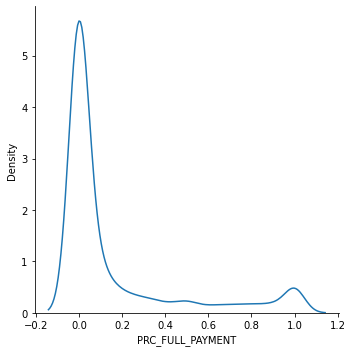

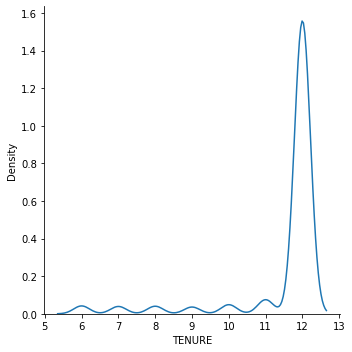

In [17]:
for col in cont_columns:
    sns.displot(x=df[col], kind="kde")
    plt.show()

#### most of the data is right skewed

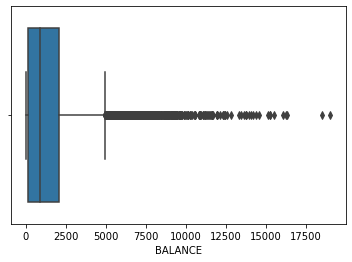

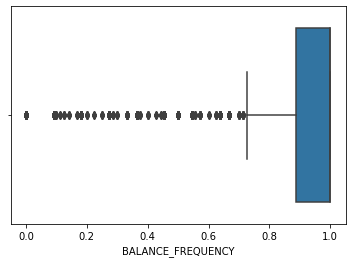

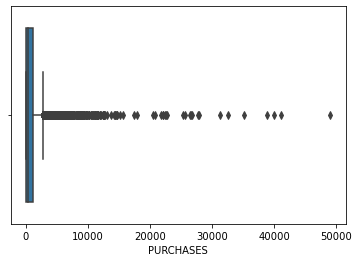

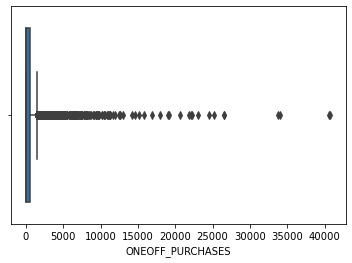

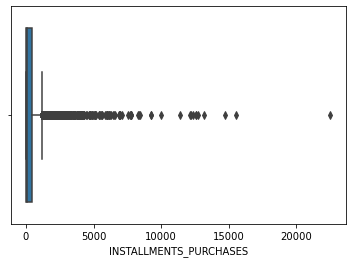

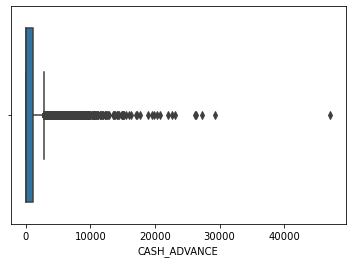

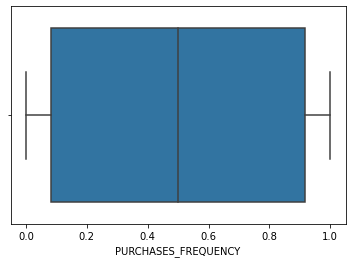

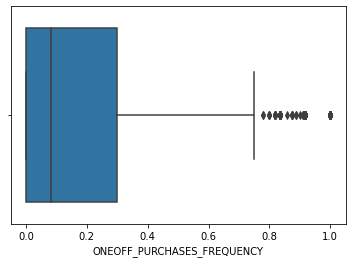

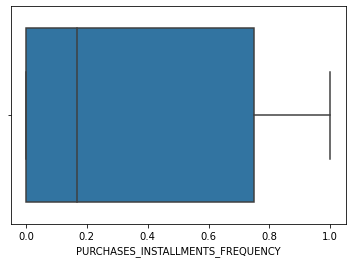

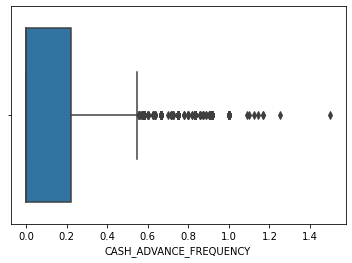

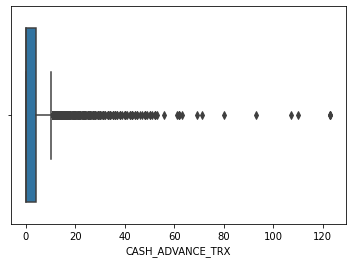

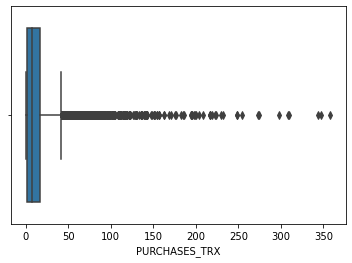

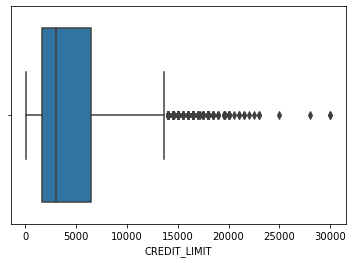

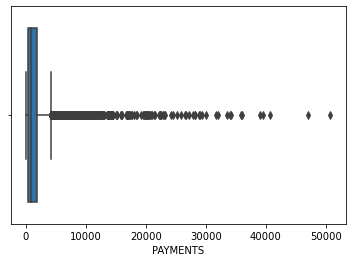

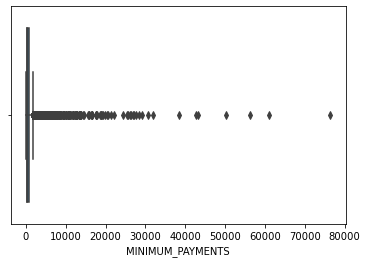

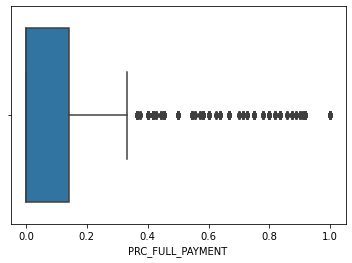

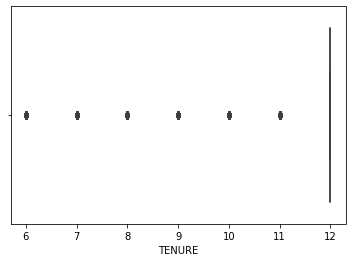

In [16]:
# box plot to see outliers and also skeweness of data
for col in cont_columns: 
    if not (df[col].dtype == 'object'):
        sns.boxplot(x = df[col])
        plt.show()

<AxesSubplot:>

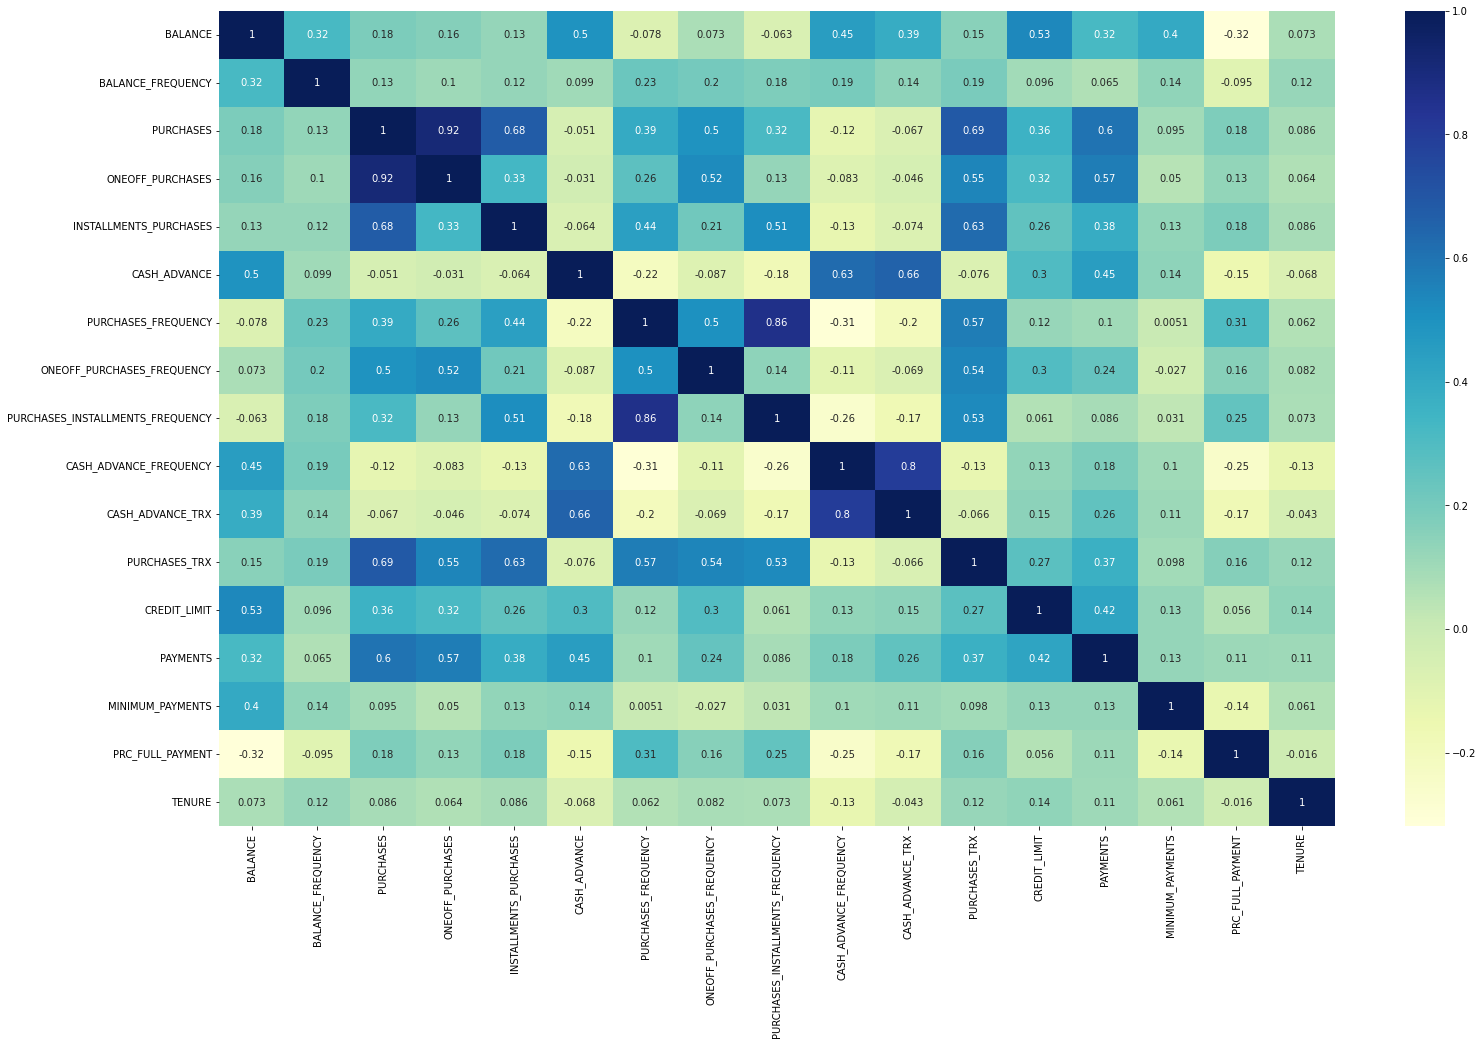

In [18]:
#correlation
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

# Modeling 

In [42]:
#Choosing balance and credit limit due to high correlation between them
X = df.iloc[:,[12,0]]

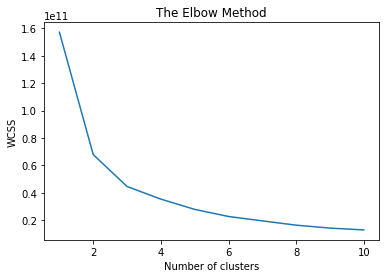

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

it seems that 3 is better number of clusters but after some research and after visualizing the data it was obvious that 4 clusters was better for classification

In [44]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X = X.values

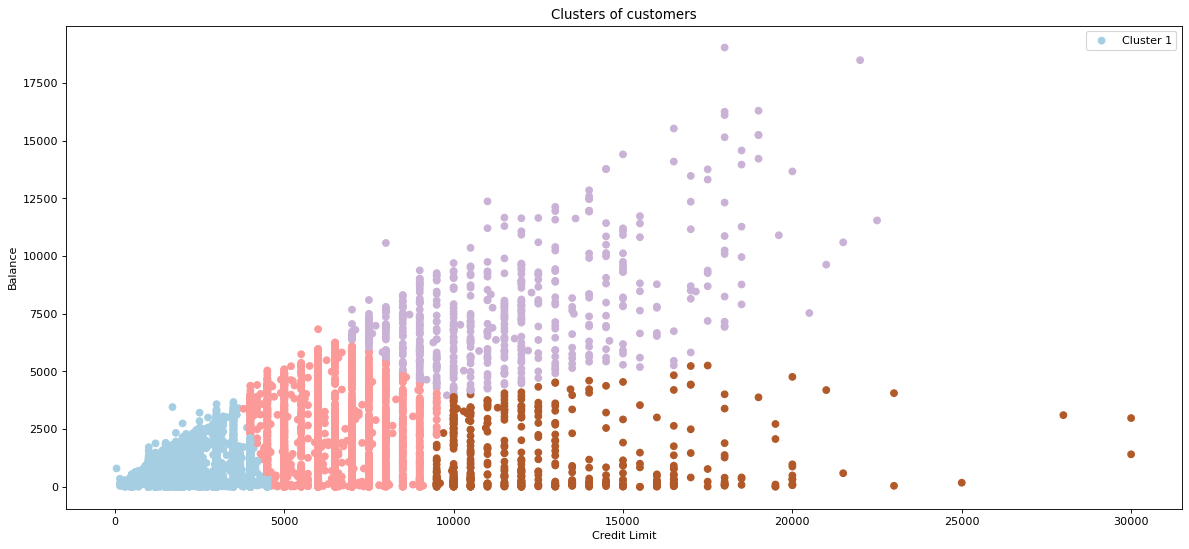

In [53]:
from sklearn.cluster import KMeans
plt.figure(figsize=(18, 8), dpi=80)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired',label = 'Cluster 1')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

In [102]:
#Choosing payments and purchases to better understand customers behaviour
X2 = df.iloc[:,[2,13]]

In [103]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X2)
X2 = X2.values

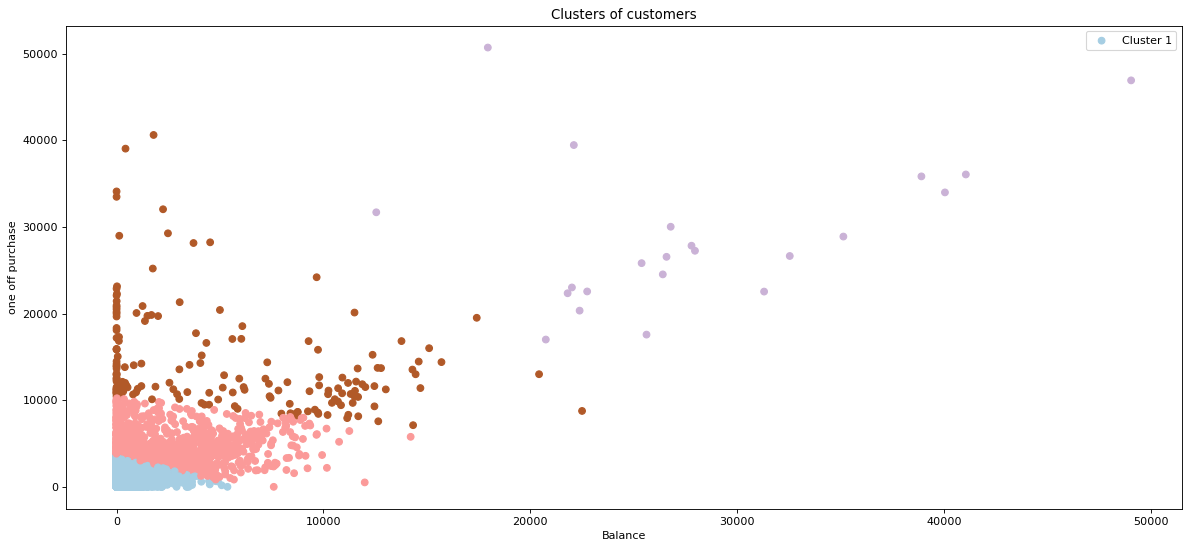

In [104]:
from sklearn.cluster import KMeans
plt.figure(figsize=(18, 8), dpi=80)
km.fit(X2)
y_pred = km.predict(X2)
plt.scatter(X2[:,0], X2[:,1],c=y_pred, cmap='Paired',label = 'Cluster 1')
plt.title('Clusters of customers')
plt.ylabel('one off purchase')
plt.xlabel('Balance')
plt.legend()
plt.show()

## Insights:
The first centroid (blue one) represents customers with low credit limits and balances, indicating that these customers do not have much purchasing power and should not be our focus area.


The second centroid(pink on) are customers which engage with us , but because their balances and credit limits are low, their purchasing power is not that high 
Some special benefits, such as increasing of credit limits or discounts can be provided to convert them to a better class


Customers falling under the third centroid (purple one) are the most valuable. Their credit limit and their balance is high and This category customers is our target bec they are our most performing customers , they should be given more advertisments on more expensive things than the other customers in other clusters


Custmers in the last centriod(brown one) are the ones whose balance is low but they have high credit limit which suggest that these customers should be given more offers , discounts , coupons and so on so they will buy immediately

In [105]:
#Choosing balance and one off purchase
X3 = df.iloc[:,[0,3]]

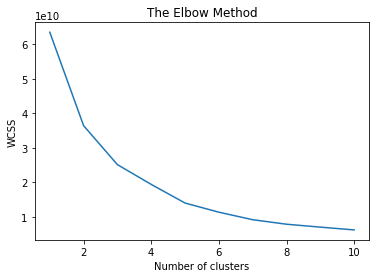

In [106]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [107]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X3)
X3 = X3.values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


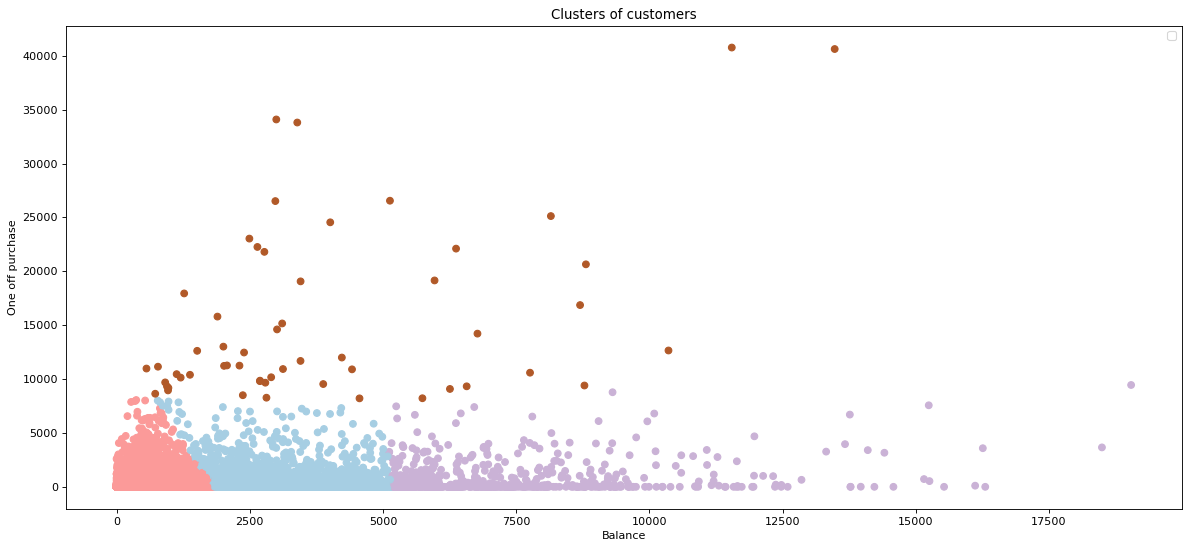

In [109]:
from sklearn.cluster import KMeans
plt.figure(figsize=(18, 8), dpi=80)
km.fit(X3)
y_pred = km.predict(X3)
plt.scatter(X3[:,0], X3[:,1],c=y_pred, cmap='Paired')
plt.title('Clusters of customers')
plt.ylabel('One off purchase')
plt.xlabel('Balance')
plt.legend()
plt.show()

#### customers that their balance is low but they have high credit limit tends to buy cash more than other customers 

In [111]:
#Choosing balance and installments purchase
X4 = df.iloc[:,[0,4]]

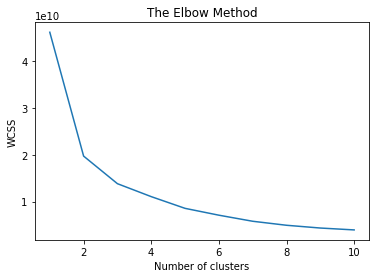

In [112]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [113]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X4)
X4 = X4.values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


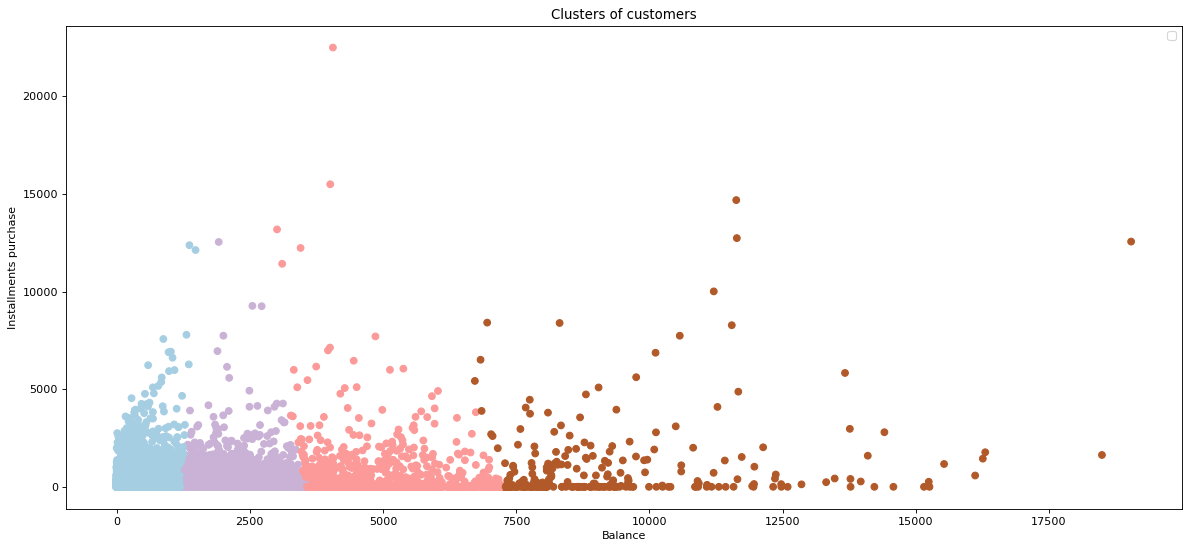

In [114]:
from sklearn.cluster import KMeans
plt.figure(figsize=(18, 8), dpi=80)
km.fit(X4)
y_pred = km.predict(X4)
plt.scatter(X4[:,0], X4[:,1],c=y_pred, cmap='Paired')
plt.title('Clusters of customers')
plt.ylabel('Installments purchase')
plt.xlabel('Balance')
plt.legend()
plt.show()

#### mainly most customers (even their balance or credit limit is high or low) don't prefer installements purchases